In [56]:
# plotting libraries
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

# data analysis libraries
import pandas as pd
import numpy as np

# general imports
from pathlib import Path

# auxiliary functions
import s3ts.analysis as aux

In [57]:
df = aux.load_data(Path("../results_synced/ratio/"))
df

,dataset,arch,repr,pretrain,fold_number,random_state,batch_size,stride_series,window_length,window_time_stride,...,target_test_acc,target_val_f1,target_test_f1,target_val_auroc,target_test_auroc,pre_val_mse,pre_val_r2,pre_best_model,pre_train_csv,pre_nepochs
0,OSULeaf,CNN,DF,False,2,0,128,True,5,1,...,0.199265,0.261665,0.199265,0.544255,0.551619,NaN,NaN,NaN,NaN,NaN
1,GunPoint,CNN,DF,False,3,0,128,False,5,1,...,0.497435,0.595362,0.497435,0.612385,0.484190,NaN,NaN,NaN,NaN,NaN
2,GunPoint,CNN,DF,True,3,0,128,False,5,1,...,0.532595,0.600313,0.532595,0.604020,0.533680,0.555848,0.704279,training/2023-03-29_09-27_EXP_ratio_DF_CNN_Gun...,training/2023-03-29_09-27_EXP_ratio_DF_CNN_Gun...,55.0
3,GunPoint,CNN,DF,True,3,0,128,False,5,1,...,0.537075,0.572173,0.537075,0.611173,0.549928,1.033283,-0.125581,training/2023-03-29_09-27_EXP_ratio_DF_CNN_Gun...,training/2023-03-29_09-27_EXP_ratio_DF_CNN_Gun...,56.0
4,GunPoint,CNN,DF,True,3,0,128,False,5,1,...,0.527725,0.628973,0.527725,0.634288,0.530503,0.374206,0.855757,training/2023-03-29_09-27_EXP_ratio_DF_CNN_Gun...,training/2023-03-29_09-27_EXP_ratio_DF_CNN_Gun...,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,Chinatown,CNN,DF,True,4,0,128,False,5,1,...,0.599772,0.711609,0.599772,0.777756,0.556404,0.555609,0.537277,training/2023-03-29_09-27_EXP_ratio_DF_CNN_Chi...,training/2023-03-29_09-27_EXP_ratio_DF_CNN_Chi...,58.0
194,Chinatown,CNN,DF,True,4,0,128,False,5,1,...,0.626324,0.722200,0.626324,0.776181,0.566689,0.514047,0.698031,training/2023-03-29_09-27_EXP_ratio_DF_CNN_Chi...,training/2023-03-29_09-27_EXP_ratio_DF_CNN_Chi...,59.0
195,ArrowHead,CNN,DF,False,0,0,128,True,5,1,...,0.339216,0.469697,0.339216,0.633068,0.524478,NaN,NaN,NaN,NaN,NaN
196,ArrowHead,CNN,DF,True,0,0,128,True,5,1,...,0.355693,0.479763,0.355693,0.641987,0.524705,1.215821,-0.370680,training/2023-03-29_22-54_EXP_ratio_DF_CNN_Arr...,training/2023-03-29_22-54_EXP_ratio_DF_CNN_Arr...,49.0


In [58]:
cols = ['tgt_nepochs', 'pre_nepochs', 'target_val_acc', 'target_val_auroc', 'target_test_acc', 'target_test_auroc']
df.columns

Index(['dataset', 'arch', 'repr', 'pretrain', 'fold_number', 'random_state',
       'batch_size', 'stride_series', 'window_length', 'window_time_stride',
       'window_patt_stride', 'train_events_per_class',
       'train_event_multiplier', 'nevents_train', 'pret_event_multiplier',
       'nevents_pret', 'test_event_multiplier', 'nevents_test',
       'tgt_best_model', 'tgt_train_csv', 'tgt_nepochs', 'target_val_acc',
       'target_test_acc', 'target_val_f1', 'target_test_f1',
       'target_val_auroc', 'target_test_auroc', 'pre_val_mse', 'pre_val_r2',
       'pre_best_model', 'pre_train_csv', 'pre_nepochs'],
      dtype='object')

In [59]:
df.groupby(["dataset", "arch", 'train_events_per_class', 'pret_event_multiplier'])[cols].mean()

tgt_nepochs  \
dataset   arch train_events_per_class pret_event_multiplier                
ArrowHead CNN  8                      0                        43.200000   
                                      4                        46.000000   
                                      8                        26.000000   
CBF       CNN  8                      0                        30.400000   
                                      4                        51.600000   
                                      8                        45.200000   
                                      16                       47.400000   
               16                     0                        30.400000   
                                      4                        31.800000   
                                      8                        35.400000   
                                      16                       53.600000   
               32                     0                        67.000000   
                                      4                        29.400000   
                                      8                        11.000000   
                                      16                       32.666667   
Chinatown CNN  8                      0                        79.000000   
                                      4                        77.600000   
                                      8                        82.000000   
                                      16                       87.000000   
               16                     0                        56.400000   
                                      4                        57.400000   
                                      8                        72.000000   
                                      16                       61.000000   
               32                     0                        69.000000   
                                      4                        85.600000   
                                      8                        79.000000   
                                      16                       93.600000   
GunPoint  CNN  8                      0                        31.800000   
                                      4                        84.600000   
                                      8                        56.400000   
                                      16                       82.400000   
               16                     0                        66.400000   
                                      4                        78.800000   
                                      8                        72.800000   
                                      16                       80.600000   
               32                     0                        86.600000   
                                      4                        78.200000   
                                      8                       113.400000   
                                      16                       72.000000   
OSULeaf   CNN  8                      0                        55.000000   

                                                             pre_nepochs  \
dataset   arch train_events_per_class pret_event_multiplier                
ArrowHead CNN  8                      0                              NaN   
                                      4                        47.400000   
                                      8                        58.000000   
CBF       CNN  8                      0                              NaN   
                                      4                        48.400000   
                                      8                        58.600000   
                                      16                       58.000000   
               16                     0                              NaN   
                                      4                        48.400000   
                                

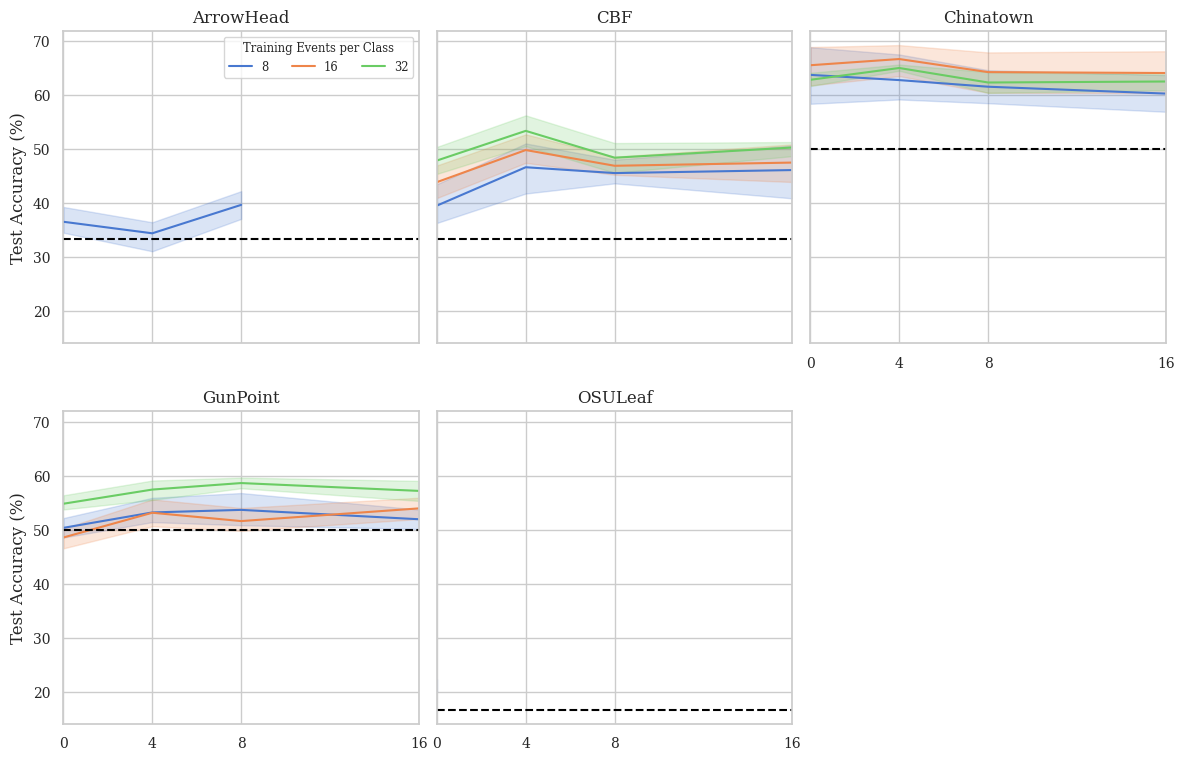

In [60]:
data = df.copy()
data['target_test_acc'] = 100*data["target_test_acc"]
#data['pret_event_multiplier'] = data['pret_event_multiplier'].astype("category")
#data["xd"] = data["pretrained"].replace({True: "(Pretrained)", False: "(Default)"})
data["arch"] = data["arch"].str.replace("_DFS", " ")
#data["hue"] = data["arch"] + " " + data["xd"]
data.sort_values(["dataset"], inplace=True)

sns.set_theme()
sns.set_style("whitegrid")
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='small')
plt.rc('ytick', labelsize='small')
# g = sns.catplot(data=data, x='train_events_per_class', y="target_test_acc", hue='pret_event_multiplier', col="dataset", #row="arch",# hue="pretrained",
#                 kind="bar",  height=4, aspect=1, margin_titles=True, legend=False, legend_out=False, palette="muted", #["blue", "green", "orange", "red"],
#                 errorbar="sd", col_wrap=3, sharex=False, sharey=True, facet_kws={"despine": False, "ylim": (15, 75),
#                 "gridspec_kws": {}});
g = sns.relplot(data=data, x='pret_event_multiplier', y="target_test_acc", hue='train_events_per_class', col="dataset", kind="line", 
                height=4, aspect=1, legend=True, palette="muted", col_wrap=3, markers="True", facet_kws={"despine": False})


g.set_titles(row_template="{row_name}", col_template="{col_name}")
g.set_ylabels("Test Accuracy (%)")
g.set_xlabels("")
g.legend.remove()

# Set the x-axis tick labels to be the same for all plots
for ax in g.axes.flat:
    ax.set_xticks([0, 4, 8, 16])
    ax.set_xlim(0,16)

#g.add_legend(adjust_subtitles=True, fontsize="x-small");
for i, nc in enumerate([3, 3, 2, 2, 6]):
    g.facet_axis(0,i).axhline(100/nc, ls="--", color="black");
g.facet_axis(0,0).legend(fontsize="x-small", title="Training Events per Class", title_fontsize="x-small", ncol=3);
plt.savefig("ratio_CNN.pdf")